In [1]:
!pip install -q --upgrade scipy

import cv2
import numpy as np
import scipy

import torch
import torchvision.models as models
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

print(scipy.__version__)

1.7.2


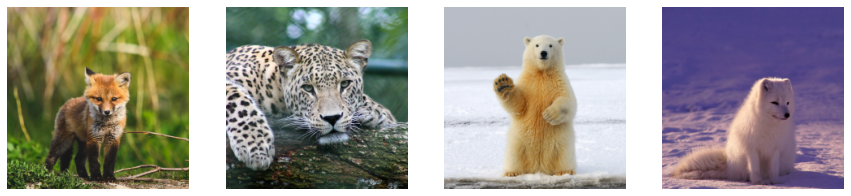

In [2]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                  std=[0.229, 0.224, 0.225])

preprocess = transforms.Compose([normalize])

def load_image(path, size=224):
  img = cv2.resize(cv2.imread(path)[...,::-1], (size, size)) / 255.0
  img = np.moveaxis(img, -1, 0).astype(np.float32)
  return img

def show(img, **kwargs):
  if torch.is_tensor(img):
    img = img.detach().cpu().numpy()
    img = np.moveaxis(img, 0, -1)
  
  img -= img.min(); img /= img.max()
  plt.imshow(img, **kwargs)
  plt.axis('off')

images_classes = [
                  ('assets/fox.png', 278),
                  ('assets/leopard.png', 288),
                  ('assets/polar_bear.png', 296),
                  ('assets/snow_fox.png', 279),
]

x = torch.Tensor(np.array([load_image(p) for p, y in images_classes])).cuda()
y = np.array([y for p, y in images_classes])

plt.rcParams["figure.figsize"] = [15, 6]
for i in range(len(x)):
  plt.subplot(1, len(x), i+1)
  show(x[i])
plt.show()

model = models.resnet50(True).eval().cuda()

# Playing with the `grid_size` parameter

In [17]:
from sobol_attribution_method.torch_explainer import SobolAttributionMethod

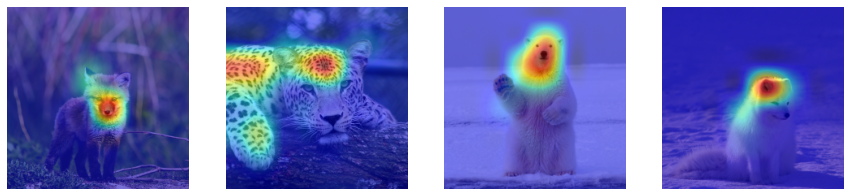

In [5]:
explainer = SobolAttributionMethod(model, grid_size=8, nb_design=32, batch_size=128)
explanations = explainer(x, y)

for i in range(len(x)):
  plt.subplot(1, len(x), i+1)
  show(x[i])
  show(explanations[i], cmap='jet', alpha=0.5)
plt.show()

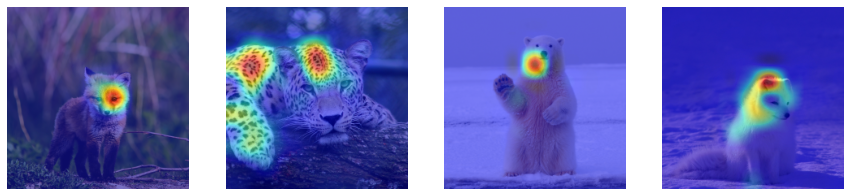

In [6]:
explainer = SobolAttributionMethod(model, grid_size=11, nb_design=32, batch_size=128)
explanations = explainer(x, y)

for i in range(len(x)):
  plt.subplot(1, len(x), i+1)
  show(x[i])
  show(explanations[i], cmap='jet', alpha=0.5)
plt.show()